In [1]:
from common import *
from experiment import *
from heuristic import *
from data import DirectRawData, RawData, PlottableData
from typing import List, Tuple, Optional, Union, Dict

# Generate network settings from network_path_analysis.ipynb

In [2]:
NETWORK_SETTINGS = []
for s1, s2 in [
    # delay, loss, bw
    (NetworkModel(100, 0, 20), NetworkModel(1, 4, 20)),  # ASYMMETRIC_NEAR
    # (NetworkModel(1, 4, 20), NetworkModel(100, 0, 20)),  # ASYMMETRIC_FAR
    (NetworkModel(100, 2, 20), NetworkModel(1, 2, 20)),  # ASYMMETRIC_BOTH_LOSSY_NEAR
    # (NetworkModel(1, 2, 20), NetworkModel(100, 2, 20)),  # ASYMMETRIC_BOTH_LOSSY_FAR
    (NetworkModel(40, 2, 40), NetworkModel(40, 2, 40)),  # SYMMETRIC_BOTH_LOSSY
]:
    ns = NetworkSetting(delay1=s1.delay, delay2=s2.delay, loss1=s1.loss, loss2=s2.loss, bw1=s1.bw, bw2=s2.bw)
    NETWORK_SETTINGS.append(ns)

# What data size should we collect for steady-state throughput?

In [3]:
def plot_data_size_vs_metric_line(data, delta, title, ylabel):
    plt.figure(figsize=(6, 4))
    
    labels = data.treatments
    assert len(data.network_settings) == 1
    network = data.network_settings[0]

    for label in labels:
        subdata = data.data[label][network]
        xs_raw = sorted(subdata.keys())
        ys_raw = [subdata[x] for x in xs_raw]

        xs = [x/1000 for x in xs_raw]
        ys = [y.p(50) for y in ys_raw]
        yerr_lower = [y.p(50) - y.p(50-delta) for y in ys_raw]
        yerr_upper = [y.p(50+delta) - y.p(50) for y in ys_raw]
        plt.errorbar(xs, ys, yerr=(yerr_lower, yerr_upper), marker='.', capsize=5, label=label)

    plt.title(title)
    plt.xlabel('Download Data Size (KB)')
    plt.ylabel(ylabel)
    plt.grid()
    plt.xlim(0)
    plt.ylim(0)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4)
    plt.show()

MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 9 --label tcp_bbr1 tcp -cca bbr -n 50000000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 10 --label tcp_bbr2 tcp -cca bbr2 -n 50000000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 10 --label pep_bbr2 tcp --pep -cca bbr2 -n 10000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 10 --label pep_bbr2 tcp --pep -cca bbr2 -n 20000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 10 --label pep_bbr2 tcp --pep -cca bbr2 -n 50000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 10 --label pep_bbr2 tcp --pep -cca bbr2 -n 100000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --de

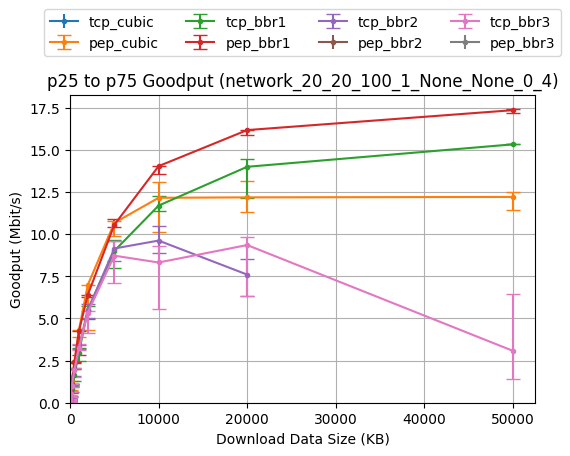

MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 10000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 20000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 50000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 100000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 200000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 9 --label pep_cubic tcp --pep -cca cubic -n 500000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 10 --label pep_cub

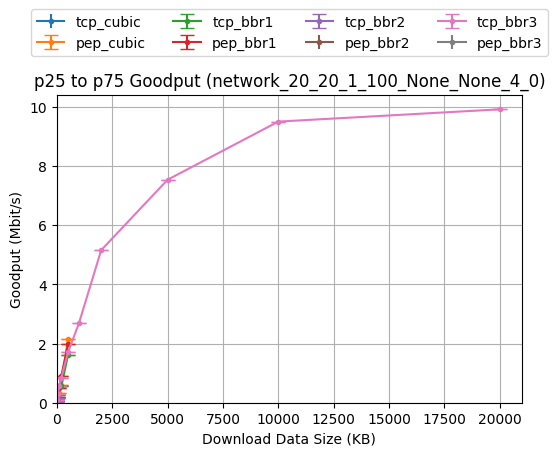

MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 10000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 20000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 50000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 100000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 200000
MISSING: sudo -E python3 emulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 500000
MISSING: sudo -E python3 emulation/main.py --bw1 

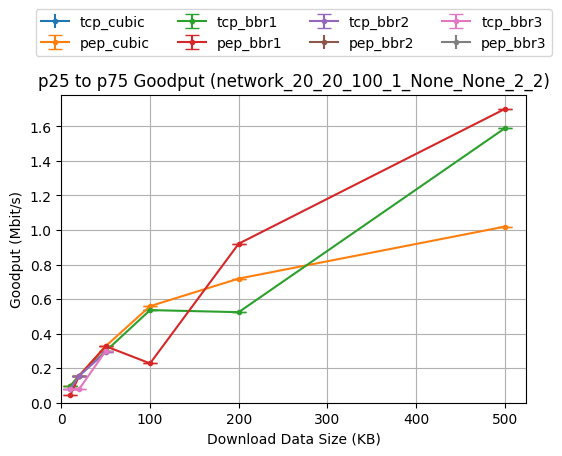

MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 10000
MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 20000
MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 50000
MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 100000
MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 200000
MISSING: sudo -E python3 emulation/main.py --bw1 40 --bw2 40 --delay1 40 --delay2 40 --loss1 2 --loss2 2 -t 9 --label pep_cubic tcp --pep -cca cubic -n 500000
MISSING: sudo -E python3 emulation/main.py --bw1 

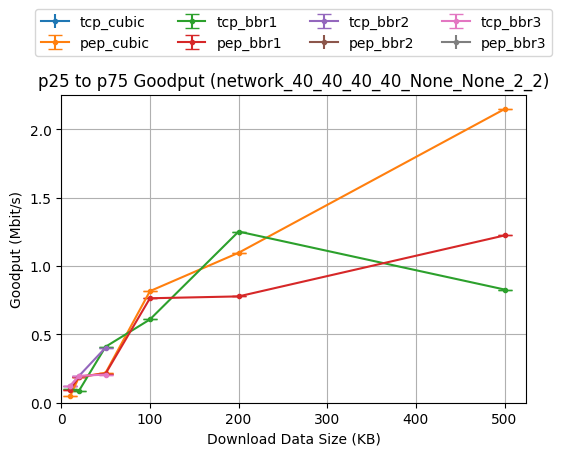

In [4]:
# Experiment settings
execute = False
num_trials = 10
treatments = [
    TCP_CUBIC, PEP_CUBIC,
    TCP_BBRV1,
    PEP_BBRV1,
    TCP_BBRV2, PEP_BBRV2,
    TCP_BBRV3, PEP_BBRV3,
]
network_settings = NETWORK_SETTINGS
data_sizes = [
    10000, 20000, 50000, # 10-99KB
    100000, 200000, 500000, # 100-999KB
    1000000, 2000000, 5000000, # 1-9MB
    10000000, 20000000, 50000000, # 10-99MB - last one will take 20s at 20Mbit/s
    # 100000000, 200000000, 500000000, # 100-999MB
]

# Plotting settings
for network_setting in network_settings:
    exp = Experiment(num_trials, treatments, [network_setting], data_sizes)
    raw_data = RawData(exp, max_data_sizes = {
        'tcp_cubic': 0,
    }, execute=execute)

    delta = 25
    title = f'p{50-delta} to p{50+delta} Goodput ({network_setting.label()})'
    metric = 'throughput_mbps'
    ylabel = 'Goodput (Mbit/s)'
    plottable_data = PlottableData(raw_data, metric=metric)
    plot_data_size_vs_metric_line(plottable_data, delta=delta, title=title, ylabel=ylabel)

# Generate ground truth data

In [3]:
# Generate the treatments
treatments_map = {
    'pep': [PEP_CUBIC, PEP_BBRV1, PEP_BBRV2, PEP_BBRV3],
    'tcp': [TCP_CUBIC, TCP_BBRV1, TCP_BBRV2, TCP_BBRV3],
}

In [4]:
# Generate the data size for each network setting
data_sizes = [2 * get_data_size(min(ns.get('bw1'), ns.get('bw2'))) for ns in NETWORK_SETTINGS]

In [5]:
# # Note: Set the index based on the Linux kernel version!
# index = 1

# # Define the experiment
# exp = Experiment(
#     num_trials=10,
#     treatments=[
#         treatments_map['pep'][index],
#         treatments_map['tcp'][index],
#     ],
#     network_settings=NETWORK_SETTINGS,
#     data_sizes=data_sizes,
#     cartesian=False,
# )

# # Parse data
# raw_data = RawData(exp, execute=False)

# Plot data

## Plotting function

In [6]:
def plot_bbr_over_time(data, groups, treatments_map, delta=25, title=None, pdf=False, legend=True):
    assert len(data.network_settings) == 1
    network = data.network_settings[0]
    ns = data.exp.get_network_setting(network)
    bottleneck_bw = min(ns.get('bw1'), ns.get('bw2'))
    assert len(data.data_sizes) == 1
    data_size = data.data_sizes[0]

    # Bar width and positions
    bar_width = 0.4
    x = np.arange(len(groups))  # group positions
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(4, 1.5))
    ax.grid()
    
    # Add bars for each treatment
    paper_label = {
        'pep': 'Split',
        'tcp': 'End-to-End',
    }
    for i, (label, cca_treatments) in enumerate(treatments_map.items()):
        ys = []
        yerr_lower = []
        yerr_upper = []

        for cca_treatment in cca_treatments:
            sublabel = cca_treatment.label()
            subdata = data.data[sublabel][network].get(data_size)
            if subdata is None:
                ys.append(0)
                yerr_lower.append(0)
                yerr_upper.append(0)
                continue
            ys.append(subdata.p(50) / bottleneck_bw)
            yerr_lower.append((subdata.p(50) - subdata.p(50-delta)) / bottleneck_bw)
            yerr_upper.append((subdata.p(50+delta) - subdata.p(50)) / bottleneck_bw)
        
        tcp_bars = ax.bar(x - bar_width/2 + i * bar_width, ys, bar_width, yerr=(yerr_lower, yerr_upper), capsize=5, label=paper_label[label])
        
    # Labeling and formatting
    ax.set_xlabel('TCP Congestion Control Algorithms')
    ax.set_ylabel('Bottleneck Utilization')
    ax.set_ylim(0, 1)
    if title is None:
        title = f'{ns.get("delay1")}ms {ns.get("loss1")}% {ns.get("bw1")}Mbit/s, {ns.get("delay2")}ms {ns.get("loss2")}% {ns.get("bw2")}Mbit/s'
        ax.set_title(title)
    else:
        ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    if legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.55), ncol=4)
    
    # Show the plot
    if pdf:
        save_pdf(f'output/bbr_over_time_{network}.pdf')
    plt.show()

## Plot data (Figure 1)

output/bbr_over_time_network_20_20_100_1_0_4.pdf


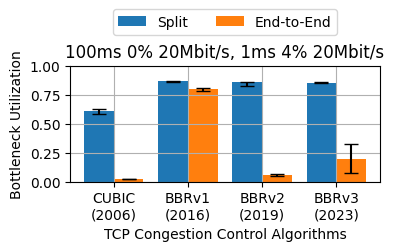

output/bbr_over_time_network_20_20_100_1_2_2.pdf


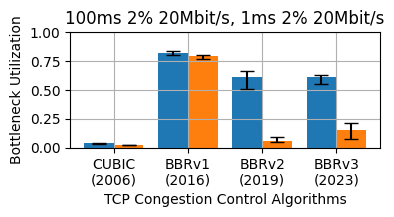

output/bbr_over_time_network_40_40_40_40_2_2.pdf


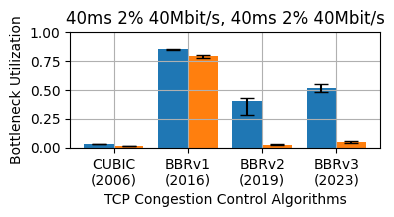

In [7]:
# Define the experiment
groups = ['CUBIC\n(2006)', 'BBRv1\n(2016)', 'BBRv2\n(2019)', 'BBRv3\n(2023)']
for i, (network_setting, data_size) in enumerate(zip(NETWORK_SETTINGS, data_sizes)):
    exp = Experiment(
        num_trials=20,
        treatments=sum(treatments_map.values(), []),
        network_settings=[network_setting],
        data_sizes=[data_size],
    )
    
    # Parse data
    raw_data = RawData(exp, execute=False)
    
    # Convert to plottable data
    metric = 'throughput_mbps'
    plottable_data = PlottableData(raw_data, metric=metric)
    plot_bbr_over_time(plottable_data, groups, treatments_map, title=None, pdf=True, legend=i==0)